In [75]:
import cv2
from math import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from PIL import Image
from math import pi

In [65]:
def bresenham(q,w):
    x0,y0 = q[0],q[1]
    x1,y1 = w[0],w[1]
    dx=abs(x0-x1)
    dy=abs(y0-y1)
    line=[]
    sx = 1 if x0<x1 else -1
    sy = 1 if y0<y1 else -1
    dif = dx - dy
    while True:
        line.append([x0,y0])
        if x0==x1 and y0==y1:
            return line
        dif2 = 2*dif
        if dif2 > -dy:
            # overshot in the y direction
            dif = dif - dy
            x0 = x0 + sx
        if dif2 < dx:
            # overshot in the x direction
            dif = dif + dx
            y0 = y0 + sy

In [13]:
line = bresenham(1,2,5,6)
line

[[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]]

In [55]:
def emiterDetector(point,rad,alfa,nrDetector,beta):
    x0 = p[0]
    y0 = p[1]
    e = [r * cos(alfa) + x0,r * sin(alfa)+y0]
    print(e)
    detectors = [[r*cos(alfa + pi - beta/2 )+x0,r*sin(alfa + pi - beta/2)+y0]]
    for i in range(1,nrDetector):
        detectors.append([r*cos(alfa + pi -beta/2 + i * beta/(nrDetector - 1))+x0,r*sin(alfa + pi -beta/2 + i * beta/(nrDetector - 1))+y0])
    return e,detectors
    

[449.3604639640269, 83.82988029028422]
[449.3604639640269, 83.82988029028422]
[[508.26214751073667, 701.1300506697455], [492.2706006515558, 706.4084467755436], [476.0235155573365, 710.8382619342467], [459.5658876157795, 714.4072280221056], [442.94329530114425, 717.1054609884206], [426.20177394724294, 718.9254882288614], [409.38768825516587, 719.8622692804261], [392.54760388885376, 719.9132097807194], [375.7281585141144, 719.078168652893], [358.9759326382233, 717.3594584963498], [342.33732060784416, 714.7618391821306], [325.85840212248826, 711.2925046707186], [309.5848146193842, 706.9610630887717], [293.56162688315584, 701.779510119954], [277.8332142303732, 695.7621957835688], [262.44313561460183, 688.9257846929851], [247.43401299233497, 681.2892099039296], [232.847413283886, 672.8736204804561], [218.72373325613432, 663.7023229237976], [205.10208764596516, 653.8007166263305]]


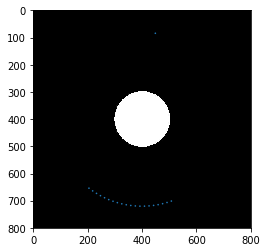

In [74]:
old_im = Image.open('Kolo.jpg')
old_size = old_im.size
x = old_size[0]
y = old_size[1]
r = 0.8*max(x,y)


new_size = (x*2, y*2)
new_im = Image.new("RGB", new_size)   ## luckily, this is already black!
new_im.paste(old_im, ((new_size[0]-old_size[0])//2,
                      (new_size[1]-old_size[1])//2))

s = [new_size[0]/2,new_size[1]/2]
new_im.show()

w, q = emiterDetector(s,r,30,20,1)
print(w)
print(q)
fig,ax = plt.subplots(1)

ax.set_aspect('equal')

# Show the image
ax.imshow(new_im)
ax.add_patch(Circle((w[0],w[1]),3))
# Now, loop through coord arrays, and create a circle at each x,y pair
for z in q:
    circ = Circle((z[0],z[1]),3)
    ax.add_patch(circ)

# Show the image
plt.show()